In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import scipy as sc
import datapungi_fed as dpf
from census import Census
from us import states 
from config_fred import fred_key
import zipfile, os, json

census_key = os.environ.get("CENSUS")
gkey = os.environ.get("GKEY")
data = dpf.data(fred_key)
c = Census(census_key)
headers = {'Content-type': 'application/json'}

## Metrics:
- [x] GDP 
- [x] GNP
- [x] UMP Rate
- [x] Total Spending
- [x] Cap Utilization Rate
- [ ] Solow Residual
- [ ] Efficiency
- [ ] Standard of Living
- [ ] Human Development Index


In [13]:
unemployment_rate = data('UNRATE')
gdp = data('gdpc1') #real gdp; billions 
gnp = data('gnp')
pce = data('pce') # personal consumption expenditures
tcu = data('tcu') # cap utliziation rate
cpi = data('CPALTT01USM657N') #consumer price index all US items
gini_fred = data('sipovginiusa')
cocd = data('K1CTOTL1CD000') # cost of consumer durables (current-cost net stock of  consumer durable goods)
pungi_list = [unemployment_rate,gdp,gnp,pce,tcu,cpi,gini_fred,cocd]

In [4]:
# unzipped_file = zipfile.ZipFile('Resources/FlatFiles.ZIP','r')
# pd.read_csv(unzipped_file.open('FixedAssets.txt'))

In [5]:
# it_all = c.acs5.tables()
# list_o_dicks = []
# for var in it_all:
#     if 'INCOME' in var['description'] and 'MEDIAN' in var['description']:
#         list_o_dicks.append(var)

# print(len(list_o_dicks))
# list_o_dicks

In [6]:
bls_data = json.dumps({"seriesid": ['LNS14000000'],"startyear":"1948", "endyear":"2020"})

In [7]:
bls_p = requests.post('https://api.bls.gov/publicAPI/v2/timeseries/data/', data = bls_data, headers = headers).json()

In [8]:
bls_unemp = pd.read_csv('devin_Resources/unemploy_bls_seas.csv')
bls_unemp.columns
del bls_unemp['Series ID']
bls_unemp

,Year,Period,Label,Value
0,1948,M01,1948 Jan,3.4
1,1948,M02,1948 Feb,3.8
2,1948,M03,1948 Mar,4.0
3,1948,M04,1948 Apr,3.9
4,1948,M05,1948 May,3.5
...,...,...,...,...
868,2020,M05,2020 May,13.3
869,2020,M06,2020 Jun,11.1
870,2020,M07,2020 Jul,10.2
871,2020,M08,2020 Aug,8.4


In [31]:
titles = []
[titles.append(series.columns) for series in pungi_list]
names = []
[names.append(titles[i][0]) for i in range(len(titles))]
names

['UNRATE',
 'gdpc1',
 'gnp',
 'pce',
 'tcu',
 'CPALTT01USM657N',
 'sipovginiusa',
 'K1CTOTL1CD000']

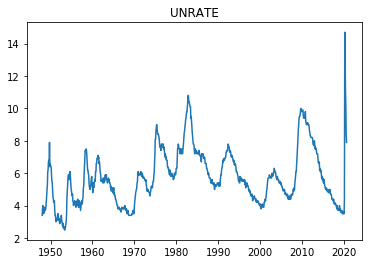

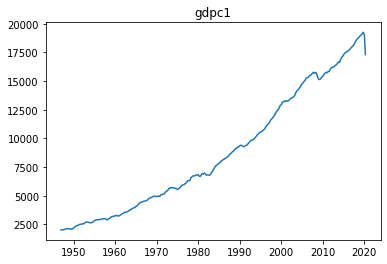

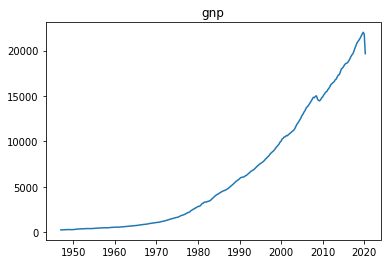

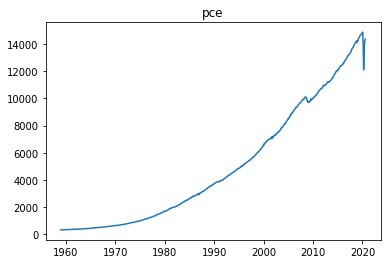

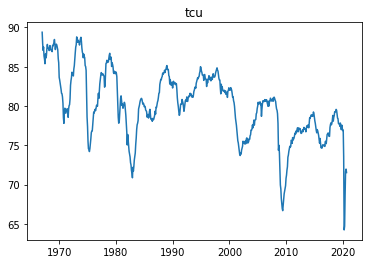

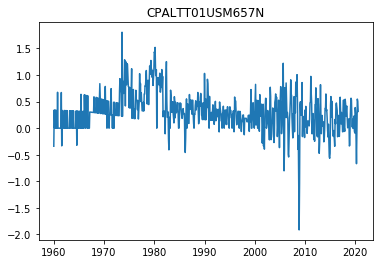

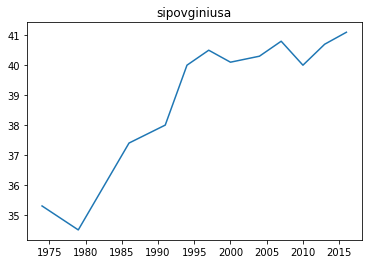

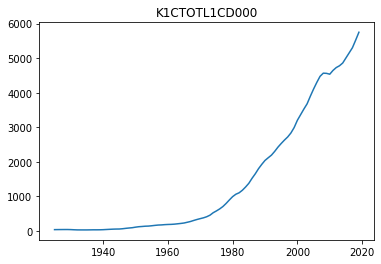

In [33]:
i = 0
for series in pungi_list:
    
    plt.figure()
    plt.plot(series)
    plt.title(names[i])
    i += 1